# Zillow Neighborhood Shapes

Import python scientific suite

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy
import pylab

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Here, we set the directory where the neighborhood shape files are located

In [2]:
hood_dir = '/Volumes/1TB_BAY/zillow_sets/neighborhood_shapes/' #on my computer, the location of the neighborhood shape files
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'
fig_path = './paper/'

We will import the 'shapefile' package, which allows us to read in the neighborhood shape information, and also the 'Basemap' package, which allows us to superimpose background map imagery.

If you have conda, you can get the Basemap package by typing 

#conda install -c anaconda basemap=1.0.7

at the terminal

In [3]:
import shapefile
from mpl_toolkits.basemap import Basemap

In [4]:
myshp = open('merged.shp')
mydbf = open('merged.dbf')
sf = shapefile.Reader(shp = myshp, dbf = mydbf) #load all neighborhoods

In [5]:
len(sf.records()) #how many neighborhoods are there?

6958

In [6]:
sf.records()[:10]

[['AK', 'Anchorage', 'Anchorage', 'Northeast', 267847.0],
 ['AK', 'Anchorage', 'Anchorage', 'Old Seward-Oceanview', 274891.0],
 ['AK', 'Anchorage', 'Anchorage', 'Portage Valley', 275077.0],
 ['AK', 'Anchorage', 'Anchorage', 'Glen Alps', 267840.0],
 ['AK', 'Anchorage', 'Anchorage', 'Campbell Park', 267835.0],
 ['AK', 'Anchorage', 'Anchorage', 'Eagle River Valley', 267837.0],
 ['AK', 'Anchorage', 'Anchorage', 'Spenard', 102588.0],
 ['AK', 'Anchorage', 'Anchorage', 'Bear Valley', 267834.0],
 ['AK', 'Anchorage', 'Anchorage', 'Girdwood', 102224.0],
 ['AK', 'Anchorage', 'Anchorage', 'Taku-Campbell', 275659.0]]

Here, we are drwaing the Zillow Neighborhoods around the phoenix area, just to see what they look like!

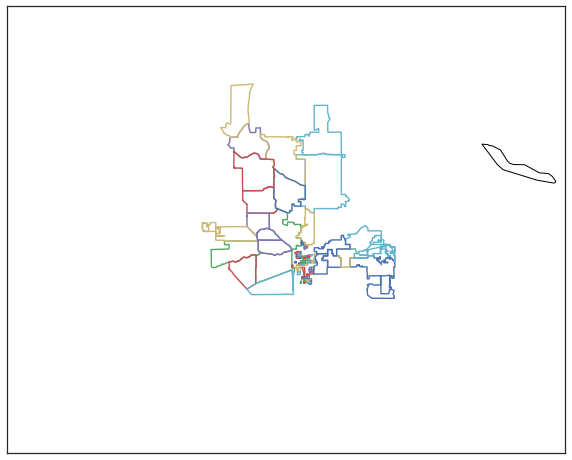

In [7]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=200000,height=160000,projection='lcc',
            resolution='h',lat_1=34.0,lat_2=34.5,lat_0=33.5, lon_0=-112.0)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    m.plot(x,y)

In [ ]:
plt.scatter(b['longitude'], b['latitude'], lw = 0, s = 1, c = b['attributes.Price Range'], cmap = 'jet')
plt.colorbar()
plt.xlim(-112.5,-111.5)
plt.ylim(33,34)

In [ ]:
b[['name','business_id','longitude','latitude','stars','review_count','attributes.Price Range','categories']]

Let's read in the yelp dataset

In [15]:
b = pd.read_csv(file_dir + 'yelp_academic_dataset_business.csv') #b for business

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Now, Let's draw the neighborhood borders for Phoenix, AZ, and plot all of the yelp businesses

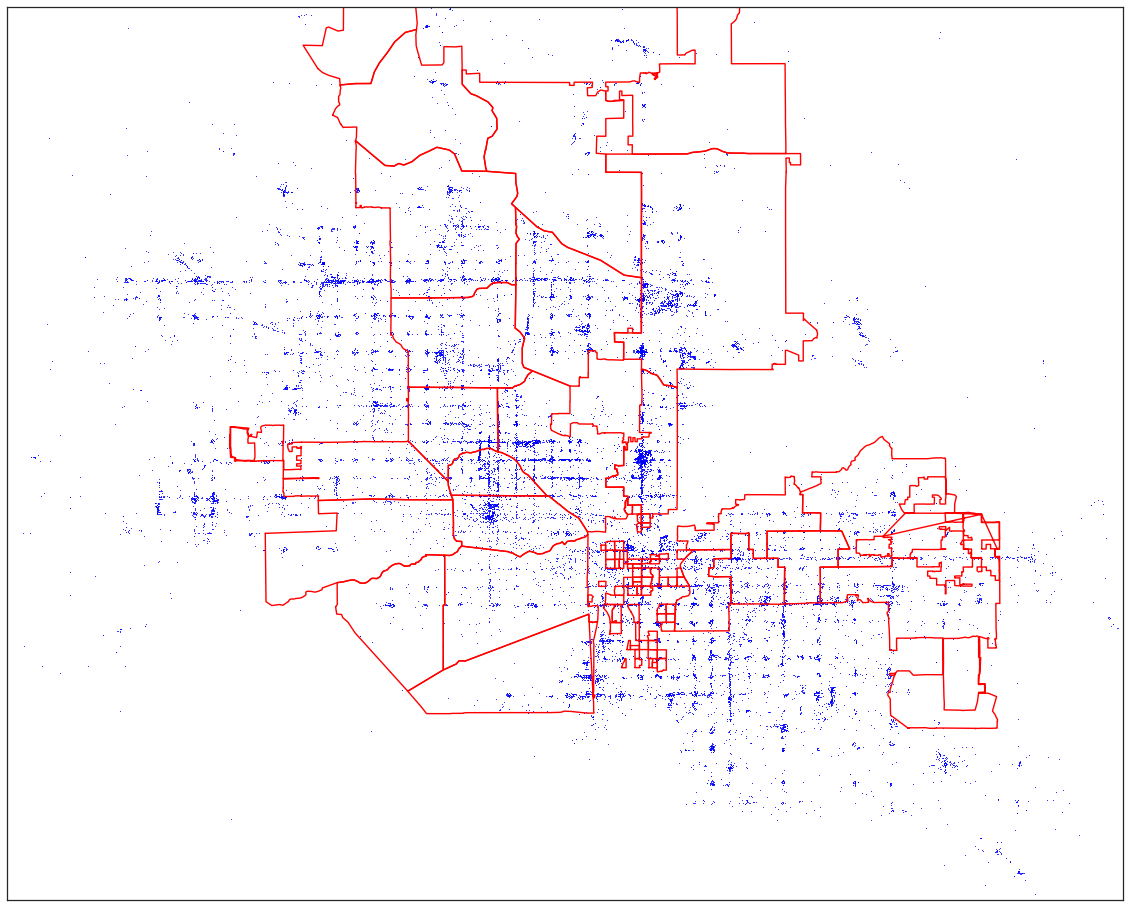

In [10]:
pylab.rcParams['figure.figsize'] = (20,16)

m = Basemap(width=100000,height=80000,projection='lcc',
            resolution='h',lat_1=34.0,lat_2=34.5,lat_0=33.5, lon_0=-112.0)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(b['longitude']), np.array(b['latitude']))
    m.plot(x,y, color = 'red')
    
m.scatter(bx,by, s = 1, lw = 0)
plt.savefig(fig_path + 'phx_test.png', dpi = 300, fmt = 'png')

We need a way to check (for each business) which polygon the business is in.
The following code was stolen from: http://geospatialpython.com/2011/01/point-in-polygon.html

In [13]:
def point_in_poly(x,y,poly):

    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

This is an attempt to find the zillow neighborhood corresponding to each yelp business. This loop works, however it is much too slow (would take over a year to run on the whole dataset). Finding the shape.points is the operation that is taking the majority of the time. We cannot loop over every neighborhood for each business. We will have to loop over only the 1 or two nearest neighborhoods for the code to run fast enough.

In [16]:
zillow_hood = []

for j in range(2): #for every yelp business
    print(j)
    for i in range(len(sf.shapes())): #for every zillow neighborhood
        print(i)
        if point_in_poly(b['longitude'][j],b['latitude'][j], sf.shapes()[i].points) == True:
            print('True')
            zillow_hood.append(sf.records()[i][-1:][0])
        else:
            print('False')
    
        print(zillow_hood)

0
0
False
[]
1
False
[]
2
False
[]
3
False
[]
4
False
[]
5
False
[]
6
False
[]
7
False
[]
8
False
[]
9
False
[]
10
False
[]
11
False
[]
12
False
[]
13
False
[]
14
False
[]
15


KeyboardInterrupt: 

We will need to find the nearest zillow neighborhoods to each yelp business. We will need to create a file of neighborhood centers.

In [18]:
for i in range(3621,len(sf.records())):
    myfile = open('shape_centers.txt','a')
    print(i)
    w_line = np.hstack((sf.records()[i][-1:][0],np.mean([sf.shapes()[i].bbox[0],sf.shapes()[i].bbox[2]]),np.mean([sf.shapes()[i].bbox[1],sf.shapes()[i].bbox[3]])))
    np.savetxt(myfile, w_line[None], newline = ' ', fmt = '%10.7f', delimiter = ',')
    myfile.write('\n')
    myfile.close()

3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
